# Introduction to  Google Earth Engine using geemap 

* **Special requirements:** A Google account.
* **Prerequisites:** You should be familiar with python and jupyter notebooks and should have finished the first practical "1.1_ENGN3903_Introduction to Python and Jupyter".


## Background

What is [Google Earth Engine](https://earthengine.google.com/#!/) (GEE)?

GEE is essentially a huge computer that stores millions of satellite images captured using different sensors. For example, GEE has the whole Landsat, and Sentinel 2 image archives for all the world. These archives have millions of satellite images, and Google stores a copy of each image in Earth Engine. 

Not only that, but GEE allows you to view, download, analyze, the data using Google's computers instead of using your own! 
By using GEE we don't have to download any imagery, or spend hours waiting for an analysis to finish.

You can access GEE in many ways, but in this course we'll use `geemap`. `geemap` is a python package that allows us to connect to GEE using Python and Jupyter Notebooks, instead of [Google's code editor](code.earthengine.google.com). This has several advantages because we can do additional analysis, better plots and maps in python than what we could do in Google's code editor.

There are also some dissadvantages to using GEE. For example, you'll need a Google account to use it, it uses a lot of internet bandwidth, there are only low resolution images for great parts of Africa, South America, and Asia. You can read more [on this recent post](https://www.matecdev.com/posts/disadvantages-earth-engine.html#gee-is-inconvenient-for-smaller-datasets) by Martin Maas.

So keep the pros and cons on your mind... in the meantime, Let's get started!
***

## Aims of the practical session

1. Introduce the students to Google Earth Engine.
1. Brief introduction to the geemap package.
1. Visualize a dataset.
 

***

## Description

In this notebook you'll learn about Google Earth Engine, and how you can access their datasets, and how we'll use it in Python. 

First we will:

- log in to Google Earth Engine, and
- load a basemap.

Then we will:
- load a few available datasets and explore how these datasets change around the world.

Lastly, we will:
- Load a series of images of the Canberra region, 
- Explain the main differences of these images,

<div class="alert alert-block alert-warning">
<b>Assessment:</b> Once you finish the practical and the excercises, remember to submit your notebook through Wattle.
</div>

***

## (Brief) Introduction to Google Earth Engine

Google Earth Engine (GEE) is 'a cloud-based platform for planetary-scale geospatial analysis that brings Google's massive computational capabilities to bear on a variety of high-impact societal issues including deforestation, drought, disaster, disease, food security, water management, climate monitoring and environmental protection. It is unique in the field as an integrated platform designed to empower not only traditional remote sensing scientists, but also a much wider audience that lacks the technical capacity needed to utilize traditional supercomputers or large-scale commodity cloud computing resources.'[source](https://www.sciencedirect.com/science/article/pii/S0034425717302900).

You can access GEE using the [code editor](https://code.earthengine.google.com/), or using the python interface. 


***

## (Brief) Introduction to the `geemap` package

Very briefly, `geemap` is a python package created by [Qiusheng Wu](https://github.com/giswqs) from the University of Tennessee, Knoxville.

The main aim of `geemap` is to allow: *(i)* interactive mapping with Google Earth Engine (GEE) within python, and *(ii)* usage of additional libraries within python for data analysis and data visualization.

You can read more about `geemap` [here](https://github.com/giswqs/geemap)

***

## Getting started


### Load packages

Import Python packages that are used for the analysis.


In [1]:
%matplotlib inline

import geemap as gmap
import ee

### Connect to Google Earth Engine (GEE)

Connect to the GEE so we can access GEE datasets and computing assets.
You may be required to input your Google account name and password. Please keep those safe and don't share them with anyone.

In [3]:
ee.Authenticate(force=True)

Enter verification code:  4/1ATx3LY60KkxEsNI-fV8VKDIMOXhro3WAoY0l-PHrfUDi81Ibf08FcPfCaFA



Successfully saved authorization token.


In [4]:
m = gmap.Map()

At some point during the authorization process you may be asked if you want to link your Google account to Google Cloud. Importantly, Google Cloud charges a fees for *some* services, but [**you will not be charged any fees for using GEE**](https://groups.google.com/g/google-earthengine-announce/c/k7nLB_uZzdo).

***

## Load a basemap

Let's add a basemap and see what happens

In [5]:
Map = gmap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

Now let's zoom into souteastern Australia. To do that we have to give the `Map` function a few additional instructions.

In [6]:
# We give the 'center' location, and a 'zoom' level.
Map = gmap.Map(center=[-35,149], zoom=6)
Map

Map(center=[-35, 149], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

Now try using different zoom values (e.g. 1, and 8)

In [ ]:
# Your code goes here.


This 'roadmap' is only one of the many basemaps available in GEE.
Let's change it to the more familiar 'satellite' basemap.

In [7]:
# We give the 'center' location, and a 'zoom' level.
Map = gmap.Map(center=[-35,149], zoom=7)
Map.add_basemap("SATELLITE")
Map

Map(center=[-35, 149], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

Try adding the following basemaps:

"ROADMAP", "OpenStreetMap", "SATELLITE", "TERRAIN", "HYBRID". You can turn them on/off using the 'wrench' icon at the top right corner.

In [ ]:
# Your code goes here.


Now search for different places and zoom in and out.
For example, you can try [Kumpupintil Lake](https://en.wikipedia.org/wiki/Kumpupintil_Lake) (a.k.a. Lake Dissapointment), [Kakadu National Park](https://en.wikipedia.org/wiki/Kakadu_National_Park), or the [Tasmanian Wilderness World Heritage Area](https://en.wikipedia.org/wiki/Tasmanian_Wilderness_World_Heritage_Area).

you can either input their location using coordinates, or scroll using the map above.

In [ ]:
# Your code goes here.


**GEE tip:** Basemaps are not data; they are only pretty pictures that allow you to see where you're working, but you cannot do any analysis on them. 

***

## Load a dataset

Now that we've successfully logges into GEE and added a basemap, it's time to add some data.

GEE has many datasets you can use for your analysis; you can explore them [here](https://developers.google.com/earth-engine/datasets/catalog).

For the moment, we'll load a Digital Elevation Model (DEM) for Australia, and start exploring this dataset. You can read more about this dataset [here](https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/72759)


In [8]:
# To add an Earth Engine dataset we follow these steps:

# Create an interactive map. In this practical session we create one every 
# time, but it's not necessary.
Map2 = gmap.Map(center=[-35,149], zoom=4)

# Tell GEE which dataset we want, and select a data layer within the dataset.
# Here we're selecting the 'elevation' layer from the DEM.
dem = ee.Image('AU/GA/DEM_1SEC/v10/DEM-H').select('elevation');

# Then we tell GEE how we want to visualize the data.
vis_params = {
#     We give minimum and maximum values,
  'min': -10.0,
  'max': 1300.0,
    
#   And we select the collor palette  
  'palette': [
      '3ae237', 'b5e22e', 'd6e21f', 'fff705', 'ffd611', 'ffb613', 'ff8b13',
    'ff6e08', 'ff500d', 'ff0000', 'de0101', 'c21301', '0602ff', '235cb1',
    '307ef3', '269db1', '30c8e2', '32d3ef', '3be285', '3ff38f', '86e26f'],
};

# Finally, we add the DEM as a new 'layer' in our map.
Map2.addLayer(dem, vis_params, 'GA dem', True, 1)
Map2

Map(center=[-35, 149], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

The `addLayer` function in GEE has the following arguments:
Arguments:

> - `eeObject` (Collection|Feature|Image|RawMapId): The object to add to the map.
> - `visParams` (FeatureVisualizationParameters|ImageVisualizationParameters, optional):The visualization parameters. For > > - `Images and ImageCollection`, see ee.data.getMapId for valid parameters. For Features and FeatureCollections, the only supported key is "color", as a CSS 3.0 color string or a hex string in "RRGGBB" format. Ignored when eeObject is a map ID.
> - `name` (String, optional):The name of the layer. Defaults to "Layer N".
> - `shown` (Boolean, optional):A flag indicating whether the layer should be on by default.
> - `opacity` (Number, optional):The layer's opacity represented as a number between 0 and 1. Defaults to 1.


The map above shows the elevation of all locations in the Australian mainland and Tasmania. We can get the values of each pixel in the dataset by using the GEE 'Inspector Tool', as shown in the image below. Note that the icon may be slightly different in your computer.
![1.2_fig7.png](https://github.com/nicolasyounes/engn3903/raw/main/figures/1.2_fig7.png)

Use the inspector tool to get the values of the following sites:
- Uluru (NT)
- Mount Kosciuszko (NSW)
- Broome (WA),
- Black Mountain (ACT).
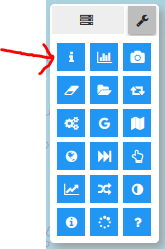

Notice that you can also control which layers you see, and their transparency. 

To access the layer controls, just click on the 'wrench' incon on the map's upper right side, and then select the 'layer tab' (red box). 
Here, you'll see a list of all the layers in the current map.
You can turn on/off the layers you want, and you can reduce their transparency to see the layers below.
![](NYC_draftsAndResources/1.2_fig8_layerControl.PNG)

### <a name="ex1"></a> Exercise 1 - Actual Evapotranspiration data

In this exercise you'll need to:
1. Search for the 'Actual Evapotranspiration for Australia (CMRSET Landsat V2.2)' dataset.
1. Add the dataset to an interactive map.
1. Use the following palette: '000004, 180f3d, 440f76, 721f81, 9e2f7f, cd4071, f1605d, fd9668, feca8d, fcfdbf'
1. Finnd the actual evapotranspiration (AET) for the following coordinates:
> - (151.5936, -30.9843),
> - (144.0591, -19.5628),
> - (130.8405, -12.4481),
> - (133.2547, -23.6767).

You can learn more about this dataset [here](https://portal.tern.org.au/actual-evapotranspiration-australia-cmrset-algorithm/21915).

In [ ]:
# Your code goes here.


***

## Load multiple dataset to a single map

Loading multiple datasets into GEE is very similar to loading a single dataset.

Here, we'll load tree different datasets:
1. [GlobCover: Global Land Cover Map](https://developers.google.com/earth-engine/datasets/catalog/ESA_GLOBCOVER_L4_200901_200912_V2_3),
1. [SRTM Digital Elevation Data Version 4](https://developers.google.com/earth-engine/datasets/catalog/CGIAR_SRTM90_V4), and
1. [FAO GAUL: Global Administrative Unit Layers 2015, First-Level Administrative Units](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level1)

Let's look at the code below:

In [9]:
# Create a new map and add the satellite basemap
Map3 = gmap.Map(center=[-35,149], zoom=4)
Map3.add_basemap("SATELLITE")

# Add Earth Engine datasets
dem = ee.Image('CGIAR/SRTM90_V4').select('elevation')
landcover = ee.Image('ESA/GLOBCOVER_L4_200901_200912_V2_3').select('landcover')
states = ee.FeatureCollection("FAO/GAUL/2015/level1")

# Set visualization parameters for the DEM.
vis_params = {
    'min': 0,
    'max': 8000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

# Add Earth Eninge layers to Map
Map3.addLayer(dem, vis_params, 'SRTM DEM', True, 0.8)
Map3.addLayer(landcover, {}, 'ESA Land cover', True, 0.7)
Map3.addLayer(states, {}, "Countries and states")
Map3

Map(center=[-35, 149], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In the map above, use the inspector tool to see the information of different places on Earth.

Try, for example:
> - (109.1768, -0.2141),
> - (126.5901, 35.7657),
> - (-7.1796, 5.9330),
> - (249.0571, 54.0533),

Did you find anything interesting in any of these places?
If so, let us know.

***

## Summary

In this practical session you've learned a bit about GEE. GEE is one of the many online tools dedicated to remote sensing image processing and analysis. It is an extremely complex and cloud based software, and thus it is not possible to teach all aspects of its use within a single remote sensing course. Interested students are encouraged to pursue further study through independent research projects. Talk to us if you are interested in such opportunity.

You've accessed GEE using the python package `geemap`, which allows us to expand GEE's capabilities. 

Finally, you learned about basemaps (Which are for display purposes only), and you added and explored different datasets.

***

## References

- https://geemap.org/
- Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305

***

## Additional information

**Sources:** The code in this notebook as several sources, including:
https://github.com/giswqs/geemap; 

**License:** Some of the code in this notebook was initially created by [Qiusheng Wu](https://github.com/giswqs), and has been modified by Nicolas Younes and Abolfazl Abdollahi. The code in this notebook is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/), and an [MIT Licence](https://mit-license.org/). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle course forum

**Last modified:** July 2022

***